# vDataFrame[].discretize

In [ ]:
vDataFrame[].discretize(method: str = "auto",
                        h: float = 0, 
                        bins: int = -1,
                        k: int = 6,
                        new_category: str = 'Others',
                        response: str = "",
                        min_bin_size: int = 20,
                        return_enum_trans: bool = False)

Discretizes the vcolumn using the input method.

### Parameters

<table id="parameters">
    <tr> <th>Name</th> <th>Type</th> <th>Optional</th> <th>Description</th> </tr>
    <tr> <td><div class="param_name">method</div></td> <td><div class="type">str</div></td> <td><div class = "yes">&#10003;</div></td> <td>The method used to discretize the vcolumn.<br>
                                                    <ul>
                                                        <li><b>auto :</b> Uses method 'same_width' for numerical vcolumns, cast the other types to varchar.</li>
                                                        <li><b>same_freq :</b> Computes bins with the same number of elements.</li>
                                                        <li><b>same_width :</b> Computes regular width bins.</li>
                                                        <li><b>smart :</b> Uses the Random Forest on a response column to find the most relevant interval to use for the discretization.</li>
                                                        <li><b>topk :</b> Keeps the topk most frequent categories and merge the other into one unique category.</li></ul></td> </tr>
    <tr> <td><div class="param_name">h</div></td> <td><div class="type">float</div></td> <td><div class = "yes">&#10003;</div></td> <td>The interval size to convert used to convert the vcolumn. If this parameter is equal to 0, an optimised interval will be computed.</td> </tr>
    <tr> <td><div class="param_name">bins</div></td> <td><div class="type">int</div></td> <td><div class = "yes">&#10003;</div></td> <td>Number of bins used for the discretization (must be > 1)</td> </tr>
    <tr> <td><div class="param_name">k</div></td> <td><div class="type">int</div></td> <td><div class = "yes">&#10003;</div></td> <td>The integer k of the 'topk' method.</td> </tr>
    <tr> <td><div class="param_name">new_category</div></td> <td><div class="type">str</div></td> <td><div class = "yes">&#10003;</div></td> <td>The name of the merging category when using the 'topk' method.</td> </tr>
    <tr> <td><div class="param_name">response</div></td> <td><div class="type">str</div></td> <td><div class = "yes">&#10003;</div></td> <td>Response vcolumn when using the 'smart' method.</td> </tr>
    <tr> <td><div class="param_name">min_bin_size</div></td> <td><div class="type">int</div></td> <td><div class = "yes">&#10003;</div></td> <td>Minimum Number of elements in the bin when using the 'smart' method.</td> </tr>
    <tr> <td><div class="param_name">return_enum_trans</div></td> <td><div class="type">bool</div></td> <td><div class = "yes">&#10003;</div></td> <td>Returns the transformation instead of the vDataFrame parent and do not apply it. This parameter is very useful for testing to be able to look at the final transformation.</td> </tr>
</table>

### Returns

<b>vDataFrame</b> : self.parent

### Example

,age
0,2.000
1,30.000
2,25.000
3,39.000
4,71.000
,...


<object>  Name: age, Number of rows: 1234, dtype: numeric(6,3)


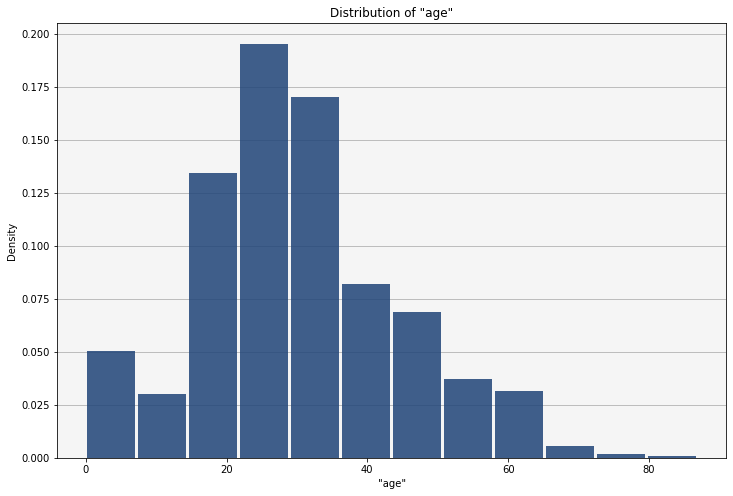

In [21]:
from vertica_ml_python.learn.datasets import load_titanic
titanic = load_titanic()
print(titanic["age"])
titanic["age"].hist()

,age
0,[0;10]
1,[30;40]
2,[20;30]
3,[30;40]
4,[70;80]
,...


<object>  Name: age, Number of rows: 1234, dtype: varchar


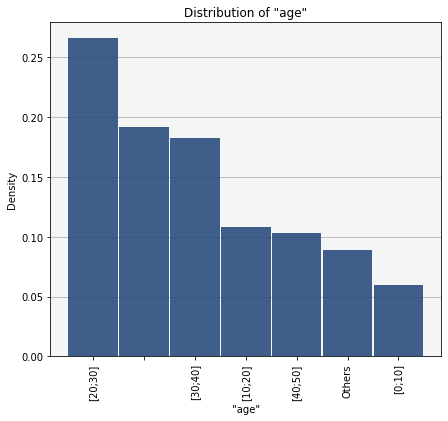

In [22]:
# Discretizing using the same bar width
titanic["age"].discretize(method = "same_width", h = 10)
print(titanic["age"])
titanic["age"].hist()

,age
0,[0.330;21.000]
1,[28.000;39.000]
2,[21.000;28.000]
3,[28.000;39.000]
4,[39.000;80.000]
,...


<object>  Name: age, Number of rows: 1234, dtype: varchar


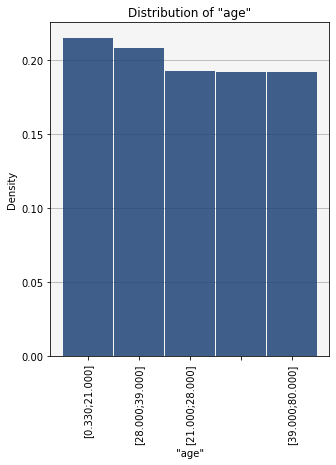

In [8]:
# Discretizing using the same frequence per bin
titanic["age"].discretize(method = "same_freq", bins = 5)
print(titanic["age"])
titanic["age"].hist()

,age
0,[0.33;5.110200]
1,[24.231000;60.082500]
2,[24.231000;60.082500]
3,[24.231000;60.082500]
4,[60.082500;80.0]
,...


<object>  Name: age, Number of rows: 1234, dtype: varchar


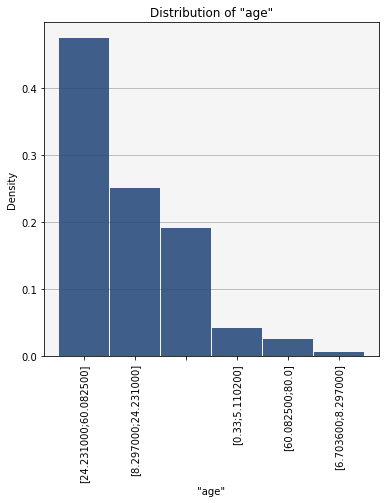

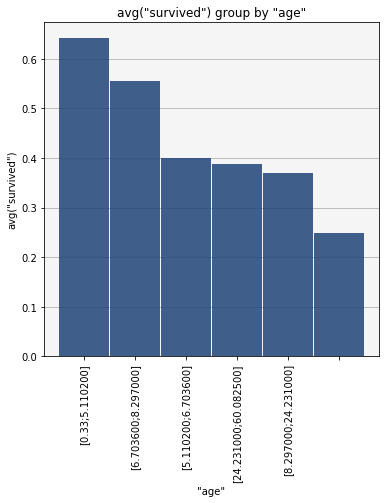

In [13]:
# Discretizing using a response column distribution
# During the process, a Random Forest will be created
titanic["age"].discretize(method = "smart", response = "survived", bins = 6)
print(titanic["age"])
titanic["age"].hist()
# Each bin will represent a Random Forest split
titanic["age"].hist(method = "avg", of = "survived")

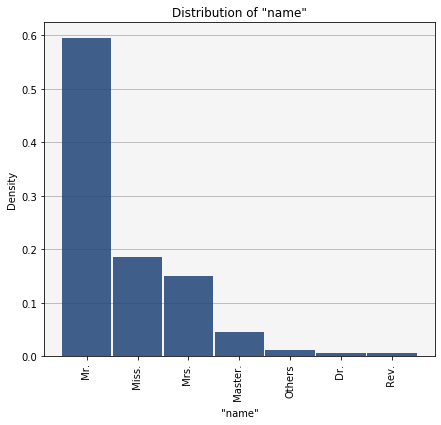

,name
0,Miss.
1,Mr.
2,Mrs.
3,Mr.
4,Mr.
,...


<object>  Name: name, Number of rows: 1234, dtype: varchar


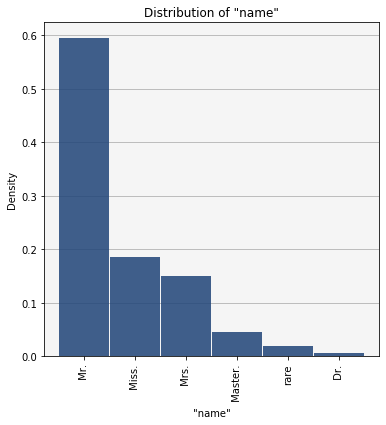

In [18]:
# Extracting the passenger Title from the name
titanic["name"].str_extract(' ([A-Za-z])+\.')
titanic["name"].hist()
# Discretizing using the TOP 5 most occurent categories
# the others will be meged together to create the 'rare' category
titanic["name"].discretize(method = "topk", k = 5, new_category = "rare")
print(titanic["name"])
titanic["name"].hist()

### See Also

<table id="seealso">
    <tr><td><a href="../decode">vDataFrame[].decode</a></td> <td>Encodes the vcolumn using a user defined Encoding.</td></tr>
    <tr><td><a href="../label_encode">vDataFrame[].label_encode</a></td> <td>Encodes the vcolumn using the Label Encoding.</td></tr>
    <tr><td><a href="../get_dummies">vDataFrame[].get_dummies</a></td> <td>Encodes the vcolumn using the One Hot Encoding.</td></tr>
    <tr><td><a href="../mean_encode">vDataFrame[].mean_encode</a></td> <td>Encodes the vcolumn using the Mean Encoding of a response.</td></tr>
</table>